In [1]:
import json
import requests
from pprint import pprint
# from config import api_key
from pygments import highlight, lexers, formatters
import pandas as pd
%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import scipy.stats as st
import gmaps
import gmaps.datasets
import gmaps.geojson_geometries

In [2]:
## Data from https://rapidapi.com/

# make a call to the URL 
url = "https://corona-virus-world-and-india-data.p.rapidapi.com/api"

# pass key and host login
headers = {
    'x-rapidapi-host': "corona-virus-world-and-india-data.p.rapidapi.com",
    'x-rapidapi-key': ""
    }

# Store the information from the GET call into the "response" variable
response = requests.request("GET", url, headers=headers)
pprint(response.json())

results = response.json()
# print(results["countries_stat"])
# convert JSON into a python dictorinary format in order to read/loop through it.
# results = response.json()

# Print result to confirm
# pprint(results["countries_stat"])

# create for loop to get each result from countries stat which is the main key of the JSON
for key in results["countries_stat"]:
    print(key["country_name"])


{'countries_stat': [{'active_cases': '762,526',
                     'cases': '903,775',
                     'country_name': 'USA',
                     'deaths': '50,988',
                     'deaths_per_1m_population': '154',
                     'new_cases': '17,333',
                     'new_deaths': '752',
                     'region': '',
                     'serious_critical': '14,932',
                     'tests_per_1m_population': '14,823',
                     'total_cases_per_1m_population': '2,730',
                     'total_recovered': '90,261',
                     'total_tests': '4,906,327'},
                    {'active_cases': '104,885',
                     'cases': '219,764',
                     'country_name': 'Spain',
                     'deaths': '22,524',
                     'deaths_per_1m_population': '482',
                     'new_cases': '6,740',
                     'new_deaths': '367',
                     'region': '',
                     'ser

                     'deaths': '49',
                     'deaths_per_1m_population': '4',
                     'new_cases': '50',
                     'new_deaths': '6',
                     'region': '',
                     'serious_critical': '11',
                     'tests_per_1m_population': '3,190',
                     'total_cases_per_1m_population': '113',
                     'total_recovered': '416',
                     'total_tests': '36,134'},
                    {'active_cases': '1,135',
                     'cases': '1,279',
                     'country_name': 'Ghana',
                     'deaths': '10',
                     'deaths_per_1m_population': '0.3',
                     'new_cases': '125',
                     'new_deaths': '1',
                     'region': '',
                     'serious_critical': '4',
                     'tests_per_1m_population': '2,838',
                     'total_cases_per_1m_population': '41',
                     'total_reco

                     'cases': '72',
                     'country_name': 'Haiti',
                     'deaths': '5',
                     'deaths_per_1m_population': '0.4',
                     'new_cases': '0',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '0',
                     'tests_per_1m_population': '61',
                     'total_cases_per_1m_population': '6',
                     'total_recovered': '2',
                     'total_tests': '690'},
                    {'active_cases': '51',
                     'cases': '70',
                     'country_name': 'Guyana',
                     'deaths': '7',
                     'deaths_per_1m_population': '9',
                     'new_cases': '0',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '5',
                     'tests_per_1m_population': '477',
                     'total_cases

Bangladesh
Colombia
Finland
Egypt
South Africa
Morocco
Luxembourg
Argentina
Algeria
Moldova
Thailand
Kuwait
Bahrain
Greece
Kazakhstan
Hungary
Croatia
Oman
Iceland
Uzbekistan
Iraq
Estonia
Armenia
Azerbaijan
New Zealand
Cameroon
Bosnia and Herzegovina
Lithuania
Slovenia
Slovakia
Afghanistan
North Macedonia
Cuba
Ghana
Bulgaria
Hong Kong
Ivory Coast
Djibouti
Nigeria
Tunisia
Guinea
Cyprus
Latvia
Andorra

Diamond Princess
Bolivia
Lebanon
Costa Rica
Albania
Niger
Kyrgyzstan
Burkina Faso
Honduras
Uruguay
Senegal
Channel Islands
San Marino
Palestine
Malta
Georgia
Jordan
Taiwan
Sri Lanka
Réunion
DRC
Guatemala
Mayotte
Kenya
Mauritius
Somalia
Montenegro
Venezuela
Mali
Isle of Man
Tanzania
Vietnam
El Salvador
Jamaica
Paraguay
Equatorial Guinea
Faeroe Islands
Congo
Sudan
Martinique
Gabon
Rwanda
Guadeloupe
Myanmar
Brunei
Gibraltar
Cambodia
Madagascar
Liberia
Ethiopia
Maldives
Trinidad and Tobago
French Guiana
Aruba
Bermuda
Monaco
Togo
Cabo Verde
Zambia
Sierra Leone
Liechtenstein
Barbados
Uganda
Sint 

In [3]:
# create a DataFrame from scratch (temporary to test)
                          
# create variable to hold the value belonging to each key in the dataset
countries = []
cases = []
total_recovered = []
serious_critical = []

# total_tests = []

# for loop to store the data for each key
for key in results["countries_stat"]:
    countries.append(key["country_name"])
    cases.append(key["cases"])
    total_recovered.append(key["total_recovered"])
    serious_critical.append(key["serious_critical"])
    #total_tests.append(key["total_tests"])
    
# print(countries)

In [4]:
# Store dataframe into variable permanent
compare_data = pd.DataFrame(columns=["Country", "Total Cases", "Total Recovered", "Serious Critical"])
compare_data["Country"] = countries
compare_data["Total Cases"] = cases
compare_data["Total Recovered"] = total_recovered
compare_data["Serious Critical"] = serious_critical
df = pd.DataFrame(compare_data, columns = ['Country', 'Total Cases', 'Total Recovered', 'Serious Critical'])
df
# data['Total tests'] = total_tests
compare_data.head()

,Country,Total Cases,Total Recovered,Serious Critical
0,USA,"903,775","90,261","14,932"
1,Spain,"219,764","92,355","7,705"
2,Italy,"192,994","60,498","2,173"
3,France,"159,828","43,493","4,870"
4,Germany,"154,159","106,800","2,908"


In [5]:
#toptwenty = deaths_df.iloc[0:20]
compare_data["Total Recovered"] = compare_data["Total Recovered"].str.replace("N/A","0")
compare_data["Total Recovered"] = compare_data["Total Recovered"].str.replace(",","").astype(float)
compare_data["Total Cases"] = compare_data["Total Cases"].str.replace(",","").astype(float)
compare_data["Serious Critical"] = compare_data["Serious Critical"].str.replace(",","").astype(float)
total_recovered = compare_data.iloc[0:10]
total_recovered.head(20)

,Country,Total Cases,Total Recovered,Serious Critical
0,USA,903775.0,90261.0,14932.0
1,Spain,219764.0,92355.0,7705.0
2,Italy,192994.0,60498.0,2173.0
3,France,159828.0,43493.0,4870.0
4,Germany,154159.0,106800.0,2908.0
5,UK,143464.0,0.0,1559.0
6,Turkey,104912.0,21737.0,1790.0
7,Iran,88194.0,66599.0,3121.0
8,China,82804.0,77257.0,57.0
9,Russia,68622.0,5568.0,2300.0


<IPython.core.display.Javascript object>


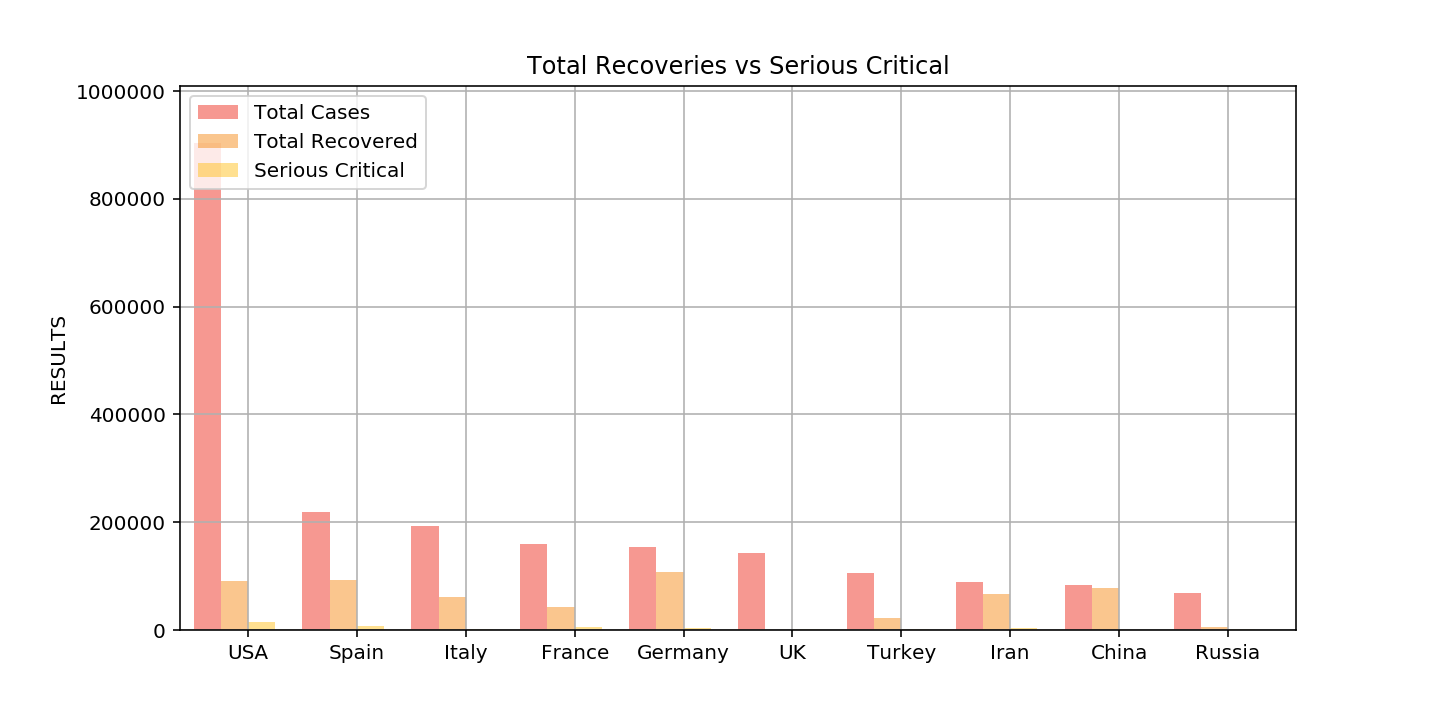

In [6]:
# Setting the positions and width for the bars
pos = list(range(len(total_recovered['Total Cases']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        total_recovered['Total Cases'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=total_recovered['Country'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        total_recovered['Total Recovered'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=total_recovered['Country'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        total_recovered['Serious Critical'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=total_recovered['Country'][2]) 

# Set the y axis label
ax.set_ylabel('RESULTS')

# Set the chart's title
ax.set_title('Total Recoveries vs Serious Critical')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(total_recovered['Country'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(total_recovered['Total Cases'] + total_recovered['Total Recovered'] + total_recovered['Serious Critical'])] )

# Adding the legend and showing the plot
plt.legend(['Total Cases', 'Total Recovered', 'Serious Critical'], loc='upper left')
plt.grid()
plt.show()


In [14]:
plt.savefig('imagename')